<p> Module Code: ST1510 PDAS
<p> Name: Yadanar Aung</p>
<p> Admin No.: P2214621</P>
<p> Class: DAAA/FT/1B/02</p>
<p> Theme: Environment, Singapore's Waste Management </p>
<h3> CA2 Assignment Analysis</h3>

<hr>
Objectives:<br>
1. Singapore's Waste Management System<br>
2. Singapore's Waste Disposal System<br>
3. Singapore's Landfill LifeSpan

<hr>
<h4>Import Libraries</h4>

In [1]:
# ** Import Libraries **

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
import statsmodels.api as sm
import math

<hr>
<h4>Load & Initialise Datasets</h4>

In [2]:
df1 = pd.read_csv("data/cleaned datasets/cleaned_2003_2020_waste.csv", sep = ",")
df2 = pd.read_csv("data/cleaned datasets/cleaned_ghg-emissions.csv", sep = ",")
df3 = pd.read_csv("data/cleaned datasets/cleaned_solid-waste-management-total-waste-landfilled-and-incinerated.csv", sep=",")

<hr>
<h3>Dataset 1: Waste Management From 2003 to 2020</h3>

In [3]:
df1

,Year,Waste Type,Total Waste Disposed,Total Waste Recycled,Total Waste Generated,Recycling Rate
0,2003,Horticultural,185300,119300,304600,0.39
1,2003,Paper/Cardboard,618500,466200,1084700,0.43
2,2003,Plastics,540800,39100,579900,0.07
3,2003,Construction & Demolition,24600,398300,422900,0.94
4,2003,Wood,172600,40800,213400,0.19
...,...,...,...,...,...,...
265,2020,Plastics,832000,36000,868000,0.04
266,2020,Ferrous metal,4000,930000,934000,0.99
267,2020,Paper/Cardboard,712000,432000,1144000,0.37
268,2020,Wood,109000,195000,304000,0.64


<hr>
<h3>Dataset 2: Greenhouse Gases From Waste (1990 to 2019)</h3>

In [4]:
df2

,Year,CH4,N2O
0,1990,1.15,0.05
1,1991,1.18,0.05
2,1992,1.22,0.05
3,1993,1.26,0.05
4,1994,1.30,0.06
5,1995,1.33,0.06
6,1996,1.37,0.06
7,1997,1.42,0.06
8,1998,1.46,0.07
9,1999,1.50,0.07


<hr>
<h3>Dataset 3: Total Waste Incinerated & Landfilled</h3>

In [5]:
df3

,year,total_waste_incinerated,total_waste_landfilled
0,2000,2.44,0.36
1,2001,2.55,0.25
2,2002,2.42,0.20
3,2003,2.31,0.19
4,2004,2.26,0.22
5,2005,2.28,0.27
6,2006,2.33,0.23
7,2007,2.38,0.19
8,2008,2.45,0.18
9,2009,2.48,0.15


<hr>
<h2>Let's first look at Singapore Waste's Statistics & How Singapore is managing its waste</h2>

<h3>Graph 1: Total Waste Disposed, Recycled & Recycling Rate Over the Years 2003 to 2020</h3>

In [6]:
# Create a variable to store "Overall" data throughout the years
wasteOverallPerYear = df1[df1["Waste Type"] == "Overall"] 
wasteOverallPerYear

,Year,Waste Type,Total Waste Disposed,Total Waste Recycled,Total Waste Generated,Recycling Rate
13,2003,Overall,2505000,2223200,4728200,0.47
17,2004,Overall,2482600,2307100,4789700,0.48
43,2005,Overall,2548800,2469400,5018200,0.49
59,2006,Overall,2563600,2656900,5220500,0.51
74,2007,Overall,2566000,3034800,5600800,0.54
87,2008,Overall,2627600,3342600,5970200,0.56
100,2009,Overall,2628900,3485200,6114100,0.57
106,2010,Overall,2759500,3757500,6517000,0.58
134,2011,Overall,2859500,4038800,6898300,0.59
148,2012,Overall,2933900,4335600,7269500,0.60


In [7]:
# create traces using a list comprehension:
trace1 = go.Bar(x = wasteOverallPerYear["Year"], y = wasteOverallPerYear["Total Waste Recycled"], name="Total Waste Recycled")

trace2 = go.Bar(x = wasteOverallPerYear["Year"], y = wasteOverallPerYear["Total Waste Disposed"], name="Total Waste Disposed")

trace3 = go.Scatter(x=wasteOverallPerYear["Year"], y=wasteOverallPerYear["Recycling Rate"], name="Recycling Rate", yaxis="y2")
data = [trace1, trace2, trace3]

# create a layout
layout = {
    'title': 'Singapore Waste Managment 2003 to 2020',
    'yaxis': {
        'zeroline': False,
        'title': "Total Waste (Tonne)"
    },
    'yaxis2': {
        'overlaying': 'y',
        'showgrid': False,
        'side': 'right',
        'zeroline': False,
        'title': 'Recycling Rate'
    },
    "barmode" : "stack",
}

# create a fig from data & layout, & plot the fig
fig = go.Figure(data=data, layout=layout)
fig.show()
pyo.plot(fig, filename='Singapore 2003 to 2020 Waste Managment.html')

'Singapore 2003 to 2020 Waste Managment.html'

As we see, there is generally an increase in the total waste generated due to rapid urbanisation & population growth. But we do see a drop in 2020 whe COVID-19 first started<br>
We can also see that the recycling rate is increasing over the years, showing great efforts by the gov to raise awarness about the important of recycling, however we start to see a drop in 2019 and 2020
<hr>

<h2>Next, we'll visualise how the different waste types are contributing to the waste in Singapore</h2>
<h3>Graph 2: Total Waste Generated By Waste Type from 2003 to 2020 in Singapore</h3>

In [8]:
# Create a variable to store data (exluding overall) throughout the years
wastePerYear = df1[df1["Waste Type"] != "Overall"] 
#wastePerYear

In [9]:
# for loop to create the traces for the seven days Official (Open)
# There are many ways to do this! Could also do this with a
# list comprehension
data = []
for wasteType in wastePerYear["Waste Type"].unique().tolist():
    trace = go.Scatter(x=wastePerYear[wastePerYear['Waste Type']==wasteType]['Year'],
                       y=wastePerYear[wastePerYear['Waste Type']==wasteType]['Total Waste Generated'],
                       mode='lines',
                       name=wasteType)
    data.append(trace)

# Define the layout
layout = go.Layout(
    title='Total Waste Generated By Waste Type from 2003 to 2020 in Singapore',
    hovermode='closest', yaxis_title="Total Waste Generated (Tonne)", xaxis_title="Year")

# Create a fig from data and layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
fig.show()
pyo.plot(fig, filename='Total Waste Generated By Waste Type.html')

'Total Waste Generated By Waste Type.html'

<h4>Insights:<br></h4>
There are 3 prominent Waste Types hovering at the top which are 'Paper/Cardboard', 'Construction & Demolition' & 'Ferrous Metal'.<br>
However, there is a big drop in "Construction & Demolition" & "Ferrous Metal" due to the COVID-19 pandemic as construction work have to be paused or delayed for the safety of workers' health.
<hr>

<h3>Graph 3: Pie Chart of Total Waste Generated By Waste Type</h3>

In [10]:
# Group By Waste Type & Sum the Total Waste Generated
wasteTotalPerWasteType = wastePerYear.groupby('Waste Type')[['Total Waste Generated']].sum()
fig = px.pie(wasteTotalPerWasteType, values='Total Waste Generated', names=wasteTotalPerWasteType.index.values.tolist(),
 title='Proportion of Total Waste Generated By Waste Type')
fig.show()
pyo.plot(fig, filename='Proportion of Total Waste Generated By Waste Typee.html')


'Proportion of Total Waste Generated By Waste Typee.html'

<h4>Insights:<br></h4>
From here, we can see that the top 3 Waste Contributors are 'Paper/Cardboard', 'Construction & Demolition' & 'Ferrous Metal'.

<hr>
<h3>Graph 4: Line Chart of Recycling Rate By Waste Types</h3>

In [11]:
# for loop to create the traces for the seven days Official (Open)
# There are many ways to do this! Could also do this with a
# list comprehension
data = []
for wasteType in wastePerYear["Waste Type"].unique().tolist():
    trace = go.Scatter(x=wastePerYear[wastePerYear['Waste Type']==wasteType]['Year'],
                       y=wastePerYear[wastePerYear['Waste Type']==wasteType]['Recycling Rate'],
                       mode='lines',
                       name=wasteType)
    data.append(trace)

# Define the layout
layout = go.Layout(
    title='Recycling Rate By Waste Type from 2003 to 2020 in Singapore',
    hovermode='closest', yaxis_title="Recycling Rate", xaxis_title="Year")

# Create a fig from data and layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
fig.show()
pyo.plot(fig, filename='Recycling Rate By Waste Type from 2003 to 2020 in Singapore.html')

'Recycling Rate By Waste Type from 2003 to 2020 in Singapore.html'

<h4>Insights:<br></h4>
We can see that generally, the recycling rate is increasing or high for most waste types, showing great effort in Singapore to promote recycling.<br>
The waste types with the top 3 recycling rate are "Construction", "Ferrous Metal" & "Used Slag"

<hr>
<h2>Next, we'll visualise Singapore's Disposal of Waste & the Greenhouse Gas Emissions From It</h2>

<h3>Graph 5: Line Chart of Total Waste Incinerated & Landfilled</h3>

In [12]:
# create traces using a list comprehension:
trace1 = go.Bar(x=df3["year"], y=df3["total_waste_incinerated"], name="Total Waste Incinerated")

trace2 = go.Bar(x=df3["year"], y=df3["total_waste_landfilled"], name="Total Waste Landfilled")

trace3 = go.Scatter(x=df3["year"], y=(df3["total_waste_incinerated"]+df3["total_waste_landfilled"]), name="Total Waste Disposed")
data = [trace1, trace2, trace3]

# create a layout
layout = go.Layout(title="Singapore's Waste Disposal Distribution 2003 to 2020", barmode="stack"
, yaxis_title="Waste (Million Tonne)", xaxis_title="Year")

# create a fig from data & layout, & plot the fig
fig = go.Figure(data=data, layout=layout)
fig.show()
pyo.plot(fig, filename="Singapore's Waste Disposal Distribution 2003 to 2020.html")

"Singapore's Waste Disposal Distribution 2003 to 2020.html"

<h4>Insights:<br></h4>
There is a small increase in waste disposed per year.<br>
Most of the waste is incinerated, while the rest is sent to landfill to control the burning of waste to maintain the air quality & air pollutants produced from it like CO2, which contributes to climate change

<hr>

<h3>Graph 6: Line Chart of Greenhouse Gas Emissions From Waste</h3>

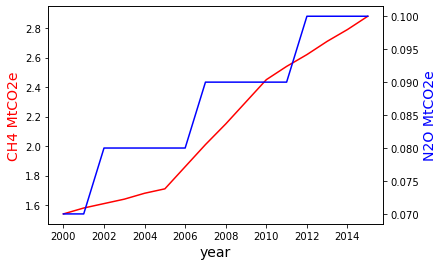

In [13]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df2[10:26]['Year'], df2[10:26]['CH4'], color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("CH4 MtCO2e", color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df2[10:26]['Year'], df2[10:26]['N2O'],color="blue",)
ax2.set_ylabel("N2O MtCO2e",color="blue",fontsize=14)
plt.show()

<h4>Insights:</h4>
Over the years, there is a <strong>gentle increase</strong> in the total amount of waste disposed.<br>
This can be explained due to rapid urbanisation as industries evolve & use more resources, leading to the increased disposal of waste.<br>
However, the increase looks gentle & controlled, which can be due to Singapore closley managing the disposal of waste, knowing that the disposal of waste emits the greenhouse gases CH4 & N2O, which contributes to climate change by warming

<hr>
<p>Moreover, it is said that the waste sector is responsible for 20% of global methane emissions. And these methane emissions have more than 80 times the warming power of CO2, hence it is criuical to monitor how waste is disposed. Thus, next we will be fitting a simple linear model to see if we can predict CH4 emissions based on the total waste disposed</p>

<h3>(7) Simple Linear Model for CH4 Emissions vs Total Waste Disposed</h3>

As we need a sample size of at least 20, we will be utilising the total waste disposed from dataset 1 & 3

In [14]:
df1_2003_2020_total_waste_disposed = df1[df1["Waste Type"] == "Overall"]["Total Waste Disposed"][:-1]

# Calculate Total Waste Disposed from Years 2000 to 2002
df3_2000_2002 = df3[df3["year"] <2003]
df3_2000_2002_total_waste_disposed = (df3_2000_2002["total_waste_incinerated"] + df3_2000_2002["total_waste_landfilled"])*1000000
# Store total waste disposed from 2000 to 2019 in a list
total_waste_disposed_2000_2019 = df3_2000_2002_total_waste_disposed.tolist() + df1_2003_2020_total_waste_disposed.tolist()

In [15]:
# Create new column "Total_Waste_Disposed" using the created list storing the values
ghg_2000_2019 = df2[10:].reset_index().drop(columns="index")
ghg_2000_2019["Total_Waste_Disposed"] = total_waste_disposed_2000_2019

<h5>
    Graph 7: A JointPlot to show the correlation between Total Waste Disposed & CH4 emissions
    <br>Along the axis, we can also see the distribution for each variable across the years 2003 to 2019
</h5>

Text(0.5, 0.98, 'CH4 Emissions Against Total Waste Disposed (Million Tonne)')

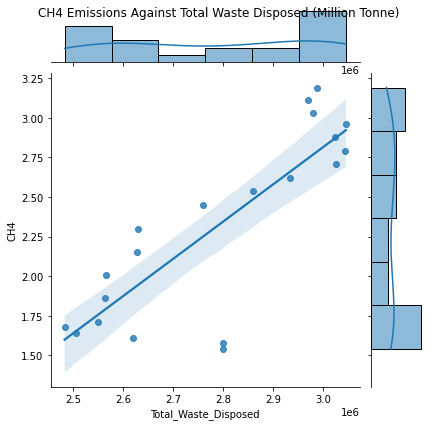

In [16]:
reg = sns.jointplot(x = 'Total_Waste_Disposed', y = 'CH4', data = ghg_2000_2019, kind='reg')
reg.fig.suptitle('CH4 Emissions Against Total Waste Disposed (Million Tonne)')

<h4>Insights:<br></h4>
There is a positive & moderate correlation between Total Waste Disposed & CH4 emissions from it

<h5>Fitting a Linear Model for Total Waste Disposed & CH4</h5>

In [17]:
# use statsmodel
ghgModel = sm.OLS.from_formula("CH4 ~ Total_Waste_Disposed", data = ghg_2000_2019).fit()
# 'CH4' is the dependent varilable (Y)
# 'Total Waste Disposed' is the independent variable
ghgPredicts = ghgModel.predict()

# The linear model
print(ghgModel.params)
print(ghgModel.summary())

Intercept              -4.232462
Total_Waste_Disposed    0.000002
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    CH4   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     38.83
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           7.05e-06
Time:                        12:55:31   Log-Likelihood:                -5.4534
No. Observations:                  20   AIC:                             14.91
Df Residuals:                      18   BIC:                             16.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<h4>Insights:<br></h4>
There's a R*2 value of 0.683<br>
Here we can see that the model is a moderate fit and that there is a moderate correlation between Total Waste Landfilled & CH4 Emissions From Waste.

<hr>
<h3>Graph 8: Line Chart of Total Waste Landfilled</h3>

In [18]:
# Calculate Percentage Difference
y = df3["total_waste_landfilled"].tolist()
diff = ["0%"]
diff.append(str(math.floor((y[0]-y[1])/y[0]*100) * -1) +"%")
diff.append(str(math.floor((y[1]-y[2])/y[1]*100) * -1) +"%")
diff.append(str(math.floor((y[2]-y[3])/y[2]*100) * -1) +"%")
diff.append(str(math.floor((y[3]-y[4])/y[3]*100) * -1) +"%")
diff.append(str(math.floor((y[4]-y[5])/y[4]*100) * -1) +"%")
diff.append(str(math.floor((y[5]-y[6])/y[5]*100) * -1) +"%")
diff.append(str(math.floor((y[6]-y[7])/y[6]*100) * -1) +"%")
diff.append(str(math.floor((y[7]-y[8])/y[7]*100) * -1) +"%")
diff.append(str(math.floor((y[8]-y[9])/y[8]*100) * -1) +"%")
diff.append(str(math.floor((y[10]-y[9])/y[9]*100)) +"%")
diff.append(str(math.floor((y[11]-y[10])/y[10]*100)) +"%")
diff.append(str(math.floor((y[12]-y[11])/y[11]*100)) +"%")
diff.append(str(math.floor((y[13]-y[12])/y[12]*100)) +"%")
diff.append(str(math.floor((y[14]-y[13])/y[13]*100)) +"%")
diff.append(str(math.floor((y[15]-y[14])/y[14]*100)) +"%")

In [19]:
# create traces using a list comprehension:
fig = px.line(x=df3["year"], y=(df3["total_waste_landfilled"]), text=diff)

fig.update_traces(textposition='top center')
fig.update_layout(title_text='Total Waste Landfilled', xaxis_title="Year", yaxis_title="Total Waste Landfilled (Million Tonne)")
fig.show()
pyo.plot(fig, filename="Total Waste Landfilled.html")

'Total Waste Landfilled.html'

<h4>Insights:<br></h4>
We can see that there is a big drop of 30% in waste sent to Semakau Landfill from 2000 to 2001. After this big drop, the amount of waset sent continously decreases & remains low.<br>
This is because, it was stated that Semakau Landill will run out of space by 2035 at the current rate of waste growth in 2000.<br>
Which is why we see the government controlling the amount of waste sent by gradually decreasing the rate sent, in order to have increase the lifespan of Semakau by 5 to 10 more years.

<hr>
<h5>Conclusion:</h5>
Waste Managment plays a big part in protecting the environment and all the scarce materials we have. Not only that, it also emits greenhouse gases which contributes to climate change and the warming of the surface. It is also especially important in Singapore where there is limited land and the only landfill we have is slowly filling up to its brim over the next few decades.